In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy as sp
from scipy.special import legendre
from scipy.integrate import simpson
import sqlalchemy
from collections import defaultdict
import datetime
import importlib
from simulator.magnetic import SimulatorMagnetic
from simulator.models import Client, Simulation
from tqdm.notebook import tqdm
from utils.utils import beep
from utils.logs import get_logger

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider

import multiprocessing
from multiprocessing import Pool, cpu_count

import logging.config
import logging
import sys, os
matplotlib.rcParams["figure.dpi"] = 100

from relaxation import action, estimators


In [2]:
if "pool" in dir():
    pool.close()
    print("closed")
importlib.reload(action)
importlib.reload(estimators)
pool = Pool(cpu_count()); pool

<multiprocessing.pool.Pool state=RUN pool_size=32>

In [3]:
data = pool.map(action.f, np.linspace(0.01,0.75,32))

In [8]:
df = pd.DataFrame(data)
df = df.set_index(df["sigma"])
df = df.drop(["sigma","rmsd"], axis=1)

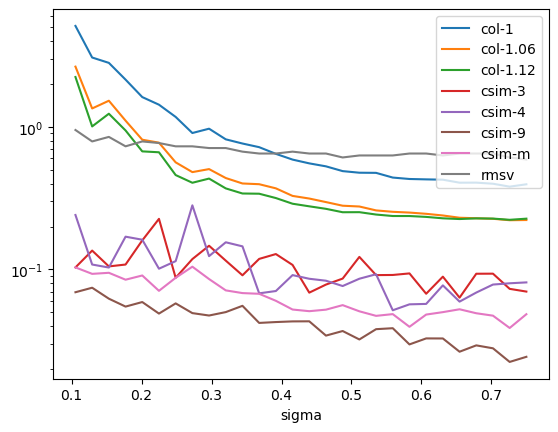

In [11]:
df.loc[0.1:].plot()
plt.yscale('log')

In [6]:
df.columns

Index(['col-1', 'col-1.06', 'col-1.12', 'csim-3', 'csim-4', 'csim-9', 'csim-m',
       'rmsd', 'rmsv'],
      dtype='object')

<AxesSubplot:xlabel='sigma'>

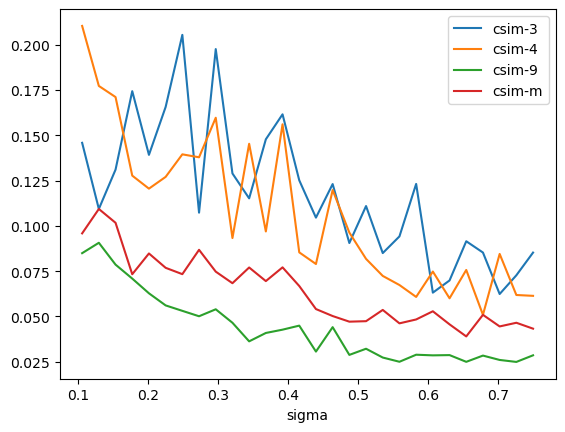

In [7]:
df.loc[0.1:][ ['csim-3', 'csim-4', 'csim-9', 'csim-m'] ].plot()